#### US Visa Predictor

##### About
The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC)

##### Problem

1. OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
2. As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

##### In this project we are going to build classification model using the given dataset.
* The model is use to if visa get approved or not based on the given dataset.
* This can be used to recommend suitable profile of the applicants for whom the visa should be granted or denied based on the criteria.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

#### Dataset : https://www.kaggle.com/datasets/moro23/easyvisa-dataset
##### The data consists of 25480 Rows and 12 Columns
##### Columns

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status: Flag indicating if the Visa was certified or denied **(Target featre)**


In [3]:
df = pd.read_csv('../data/raw/Visadataset.csv')

In [4]:
df.sample(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
7492,EZYV7493,Asia,Bachelor's,N,N,172,2007,Midwest,98967.16,Year,Y,Certified
14378,EZYV14379,Asia,Bachelor's,N,Y,3863,1958,West,66835.19,Year,Y,Denied
8279,EZYV8280,Asia,Bachelor's,Y,N,1875,1981,West,153315.16,Year,Y,Denied
7933,EZYV7934,Asia,Bachelor's,N,N,1043,1887,West,79393.31,Year,Y,Certified
17369,EZYV17370,Asia,Master's,Y,N,5000,1997,South,30404.99,Year,N,Certified


In [5]:
df.shape

(25480, 12)

In [6]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


##### Data Exploration

In [8]:
numeric_features = [col for col in df.columns if df[col].dtype != 'object']
categorical_features = [col for col in df.columns if df[col].dtype == 'object']

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [9]:
# proportion of count for categorical features
for col in df.columns:
    print(df[col].value_counts(normalize=True)*100)
    print("-------------------------------")

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
-------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-------------------------------
no_of_employees

##### Observations
1. case_id column can be dropped as it is not significant for the analysis.
2. 66% of the candidates that are applying for the visas are from Asia continent which is very biased, hence we can combine other categories to form a single category.
3. unit_of_wage and full_time_position seems to be important features as most of the candidates who are applying for the visas are doing full time role with yearly salary.

#### Univariate Analysis

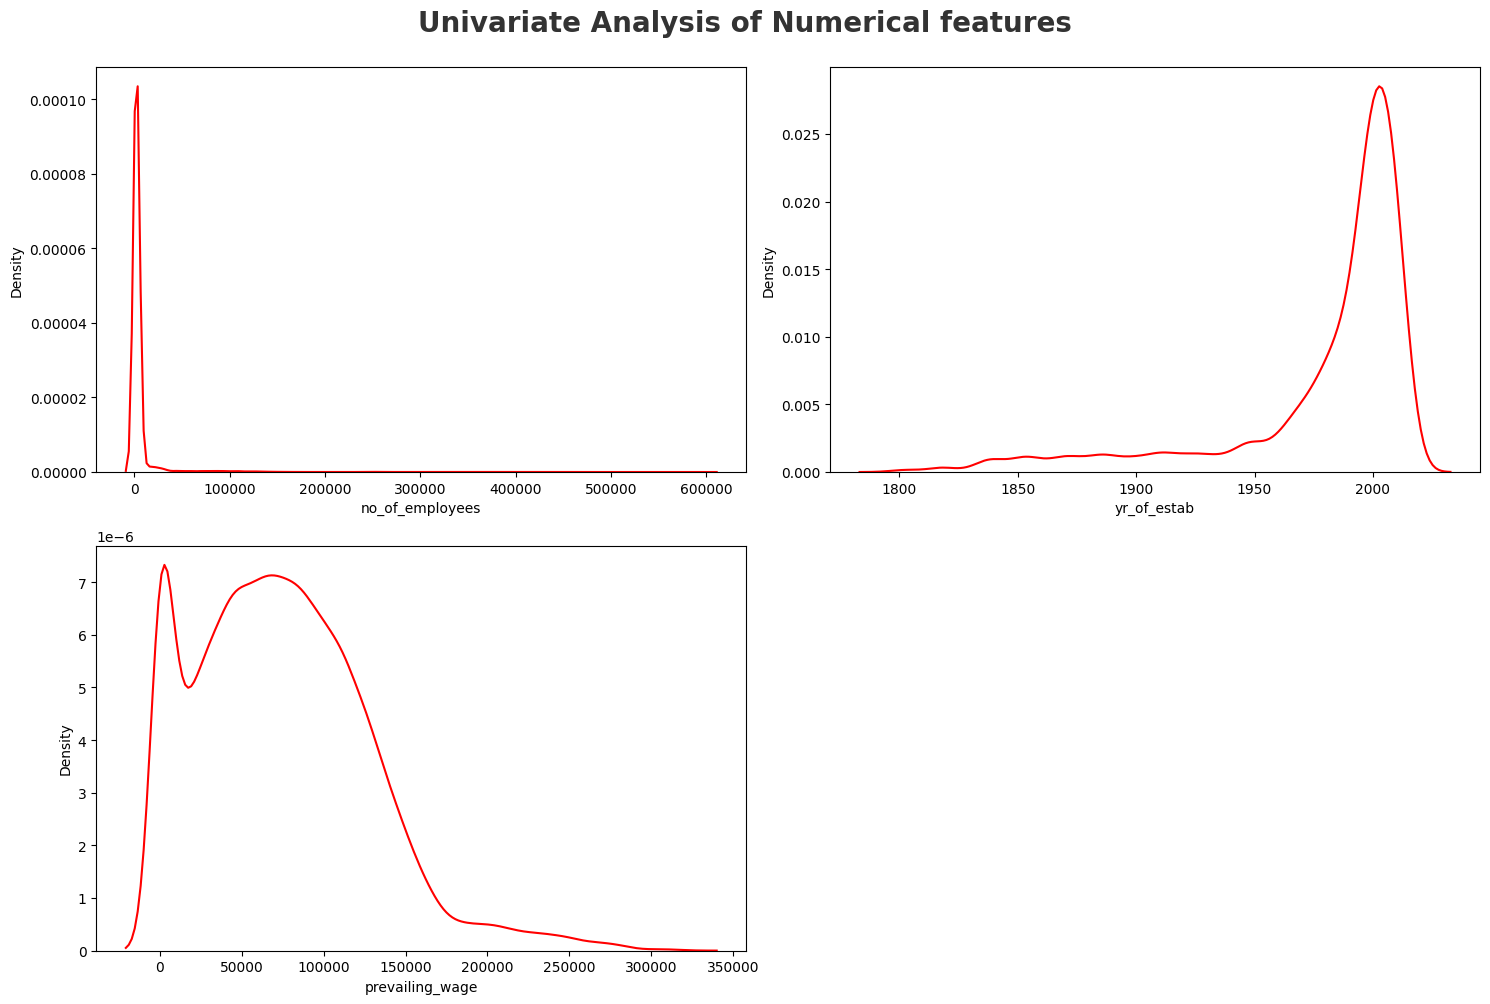

In [10]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i,col in enumerate(numeric_features,1):
    plt.subplot(2,2,i)
    sns.kdeplot(x=col, data=df, color='red')
    plt.xlabel(col)
    plt.tight_layout()
    
plt.show()

##### Observations:
1. no_of_employees is highly skewed could be potentially due to some outliers signifying that most of candidates are working in companies with head count probably less than 50,000.
2. yr_of_estab is a discrete features with left skewed distrbution.
3. From the distribution of prevailing_wage we can see that most of the candidates who applied for visas have salary in the range of 50,000 - 100,000 USD.

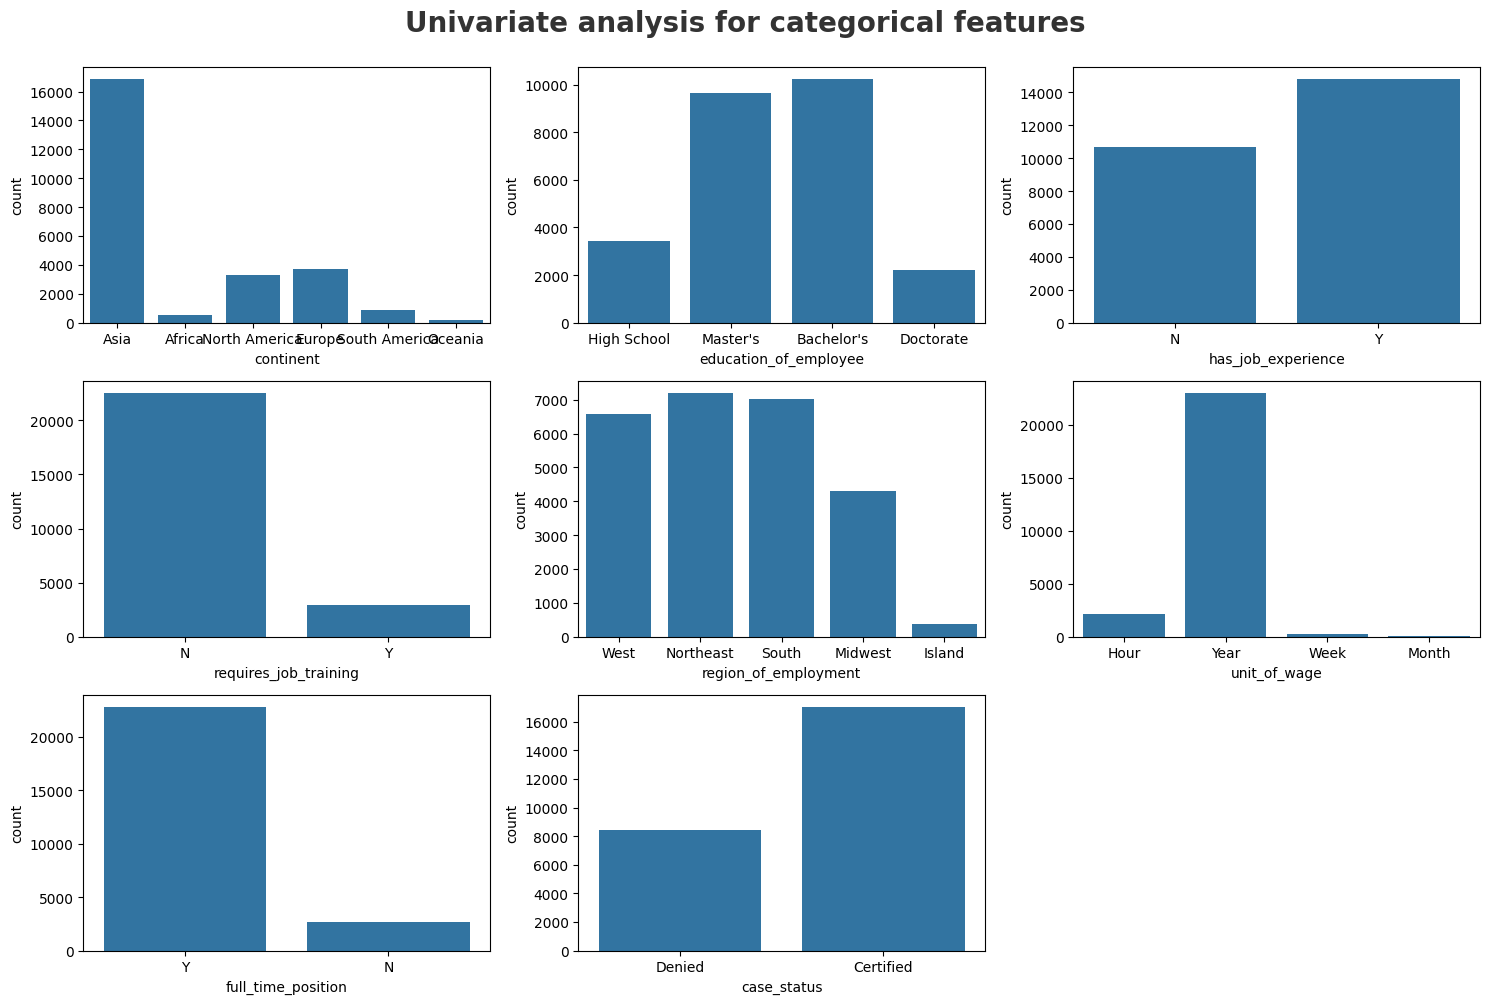

In [11]:
categorical_features.remove('case_id')
plt.figure(figsize=(15,10))
plt.suptitle('Univariate analysis for categorical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.xlabel(col)
    plt.tight_layout()
plt.show()

##### Observations
1. In continent, requires_job_training, unit_of_wage and full_time_position features, one of the category is highly dominating compared to others.
2. In rest of the features the data is balanced.

#### Multivariate Analysis

In [12]:
discrete_features = [col for col in numeric_features if len(df[col].unique())<=25]
continous_features = [col for col in numeric_features if len(df[col].unique())>25]
print('We have {} discrete features: {}'.format(len(discrete_features),discrete_features))
print('We have {} continous features: {}'.format(len(continous_features),continous_features))

We have 0 discrete features: []
We have 3 continous features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


##### Check for Multicollinearity in Numerical features

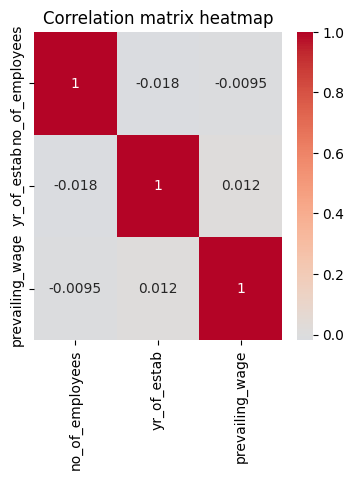

In [13]:
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(4,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix heatmap')
plt.show()

In [14]:
# Also checking using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[numeric_features].assign(Intercept=1)  # Add intercept for statsmodels
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

           feature          VIF
0  no_of_employees     1.000403
1      yr_of_estab     1.000464
2  prevailing_wage     1.000239
3        Intercept  2185.777087


##### Observations
1. Form the above correlation matrix and VIF analysis we can infer that numerical features are not correlated to each other.

##### Check for Multicollinearity in Categorical features
##### For checking multicollinearity we will use Chi-Square test and will perform statistical test between features and target variabel.

##### Null Hypothesis (H<sub>0</sub>): The feature is independent of target column (no correlation)
##### Alternate Hypothesis (H<sub>a</sub>): The feature and target column are not independent(correlated)


In [21]:
from scipy.stats import chi2_contingency

chi2_test = []

for col in categorical_features:
    p_val = chi2_contingency(pd.crosstab(df[col], df['case_status']))[1]
    if  p_val < 0.05:
        chi2_test.append([p_val, 'Reject Null Hypothesis'])
    else:
        chi2_test.append([p_val, 'Failed to reject Null Hypothesis'])
    
result_df = pd.DataFrame(columns=['Column','P_val','Hypothesis result'])

result_df['Column'] = categorical_features
result_df[['P_val','Hypothesis result']] = chi2_test
result_df

,Column,P_val,Hypothesis result
0,continent,0.0,Reject Null Hypothesis
1,education_of_employee,0.0,Reject Null Hypothesis
2,has_job_experience,0.0,Reject Null Hypothesis
3,requires_job_training,0.185565,Failed to reject Null Hypothesis
4,region_of_employment,0.0,Reject Null Hypothesis
5,unit_of_wage,0.0,Reject Null Hypothesis
6,full_time_position,0.0447,Reject Null Hypothesis
7,case_status,0.0,Reject Null Hypothesis


##### Here requires_job_training failed to reject the null hypothesis hence it doesn't correlate with the target feature.

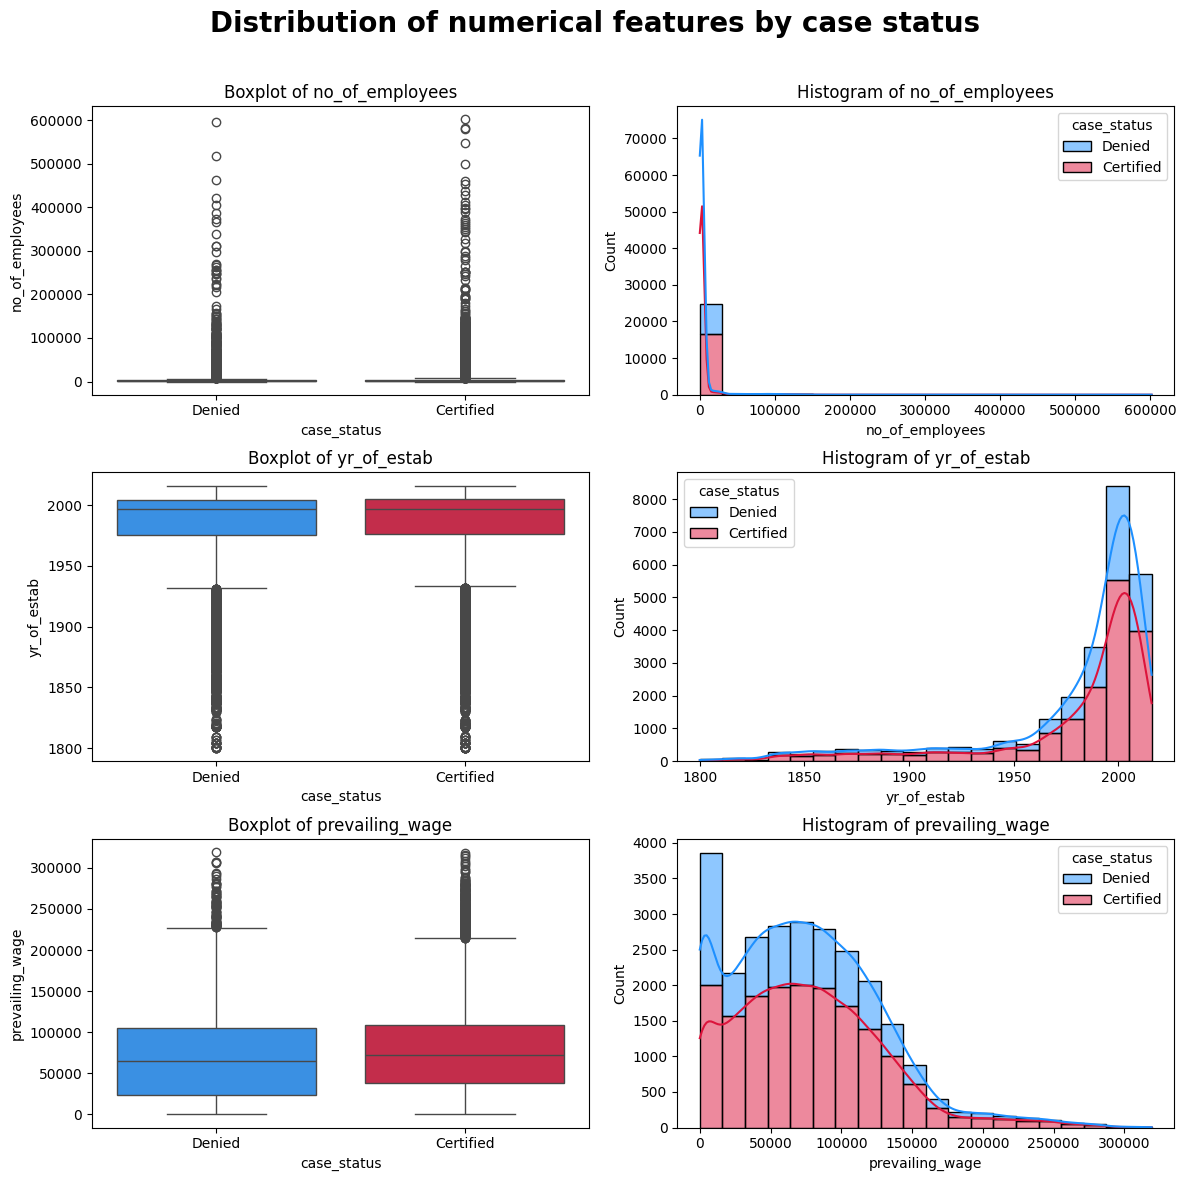

In [37]:
colors = ['#1E90FF', '#DC143C']
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.suptitle('Distribution of numerical features by case status', fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(numeric_features):
    sns.boxplot(x='case_status', y=col, data=df, palette=colors, ax=ax[i, 0])
    ax[i, 0].set_title('Boxplot of {}'.format(col), fontsize=12)
    sns.histplot(x=col, hue='case_status', data=df, bins=20, kde=True, multiple='stack', palette=colors, ax=ax[i,1])
    ax[i,1].set_title('Histogram of {}'.format(col), fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.90)

##### Observations:
1. The `no_of_employees` feature is highly right-skewed with many outliers in both the denied and certified categories. This indicates that the majority of visa applicants come from companies with fewer than 100,000 employees.
2. The `yr_of_establish` feature is left-skewed with most outliers below the lower bound of the boxplot. This suggests that most applicants are from recently established organizations, with very few coming from older companies.
3. The `prevailing_wage` feature is right-skewed with a few outliers above the upper bound of the boxplot. This indicates that most applicants have salaries ranging from 20,000 to 100,000 USD.

##### Target feature analysis

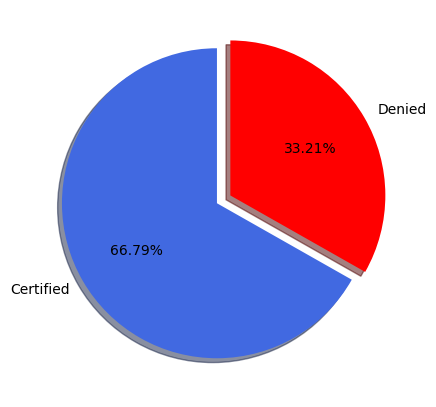

In [51]:
percentage = df['case_status'].value_counts(normalize=True)*100
labels = ['Certified','Denied']

fig, ax = plt.subplots(figsize=(5,6))
explode=(0,0.1)
colors = ['royalblue','red']
ax.pie(percentage, labels=labels, startangle=90, autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)
plt.show()

##### Here the target feature is imbalanced where 66% of the candidates are being granted visa compared to rest of the 33% candidates.

##### Relation of categorical features with target variable (case_status)

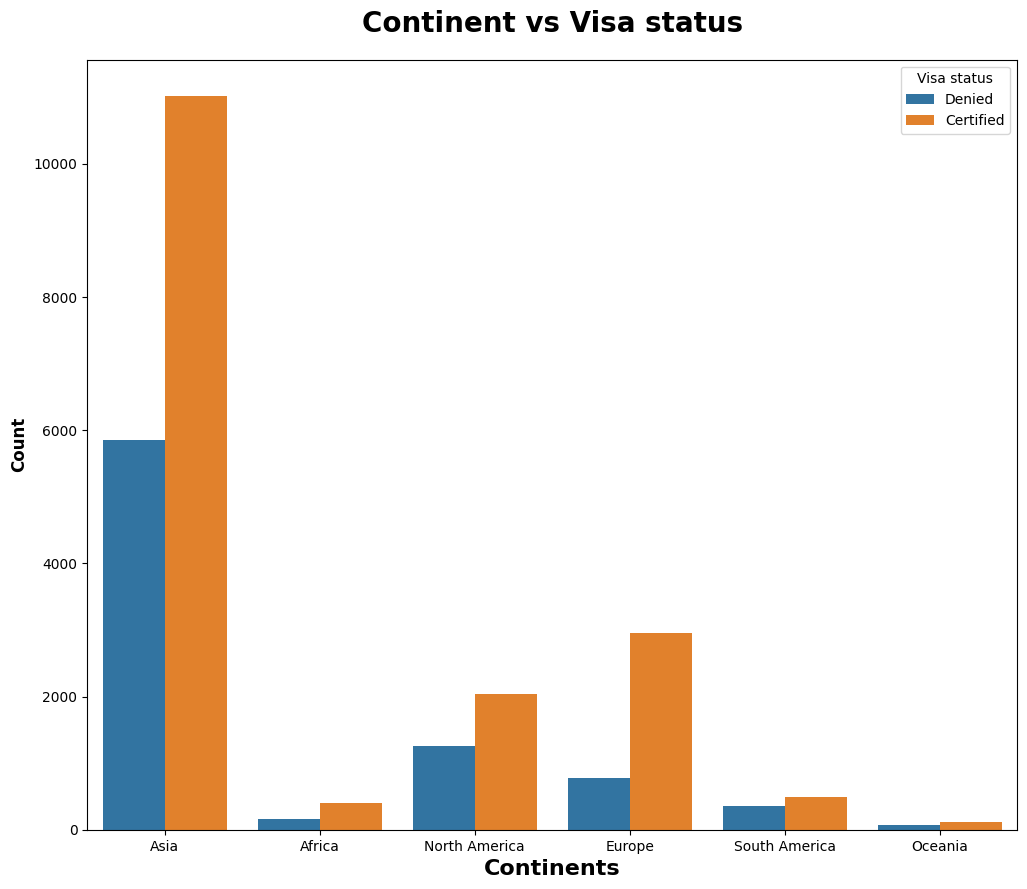

In [60]:
plt.subplots(figsize=(12,10))
sns.countplot(x='continent', hue='case_status', data=df)
plt.title('Continent vs Visa status', weight='bold', fontsize=20, pad=20)
plt.xlabel('Continents', weight='bold', fontsize=16)
plt.ylabel('Count', weight='bold', fontsize=12)
plt.legend(title='Visa status', fancybox=True)
plt.show()

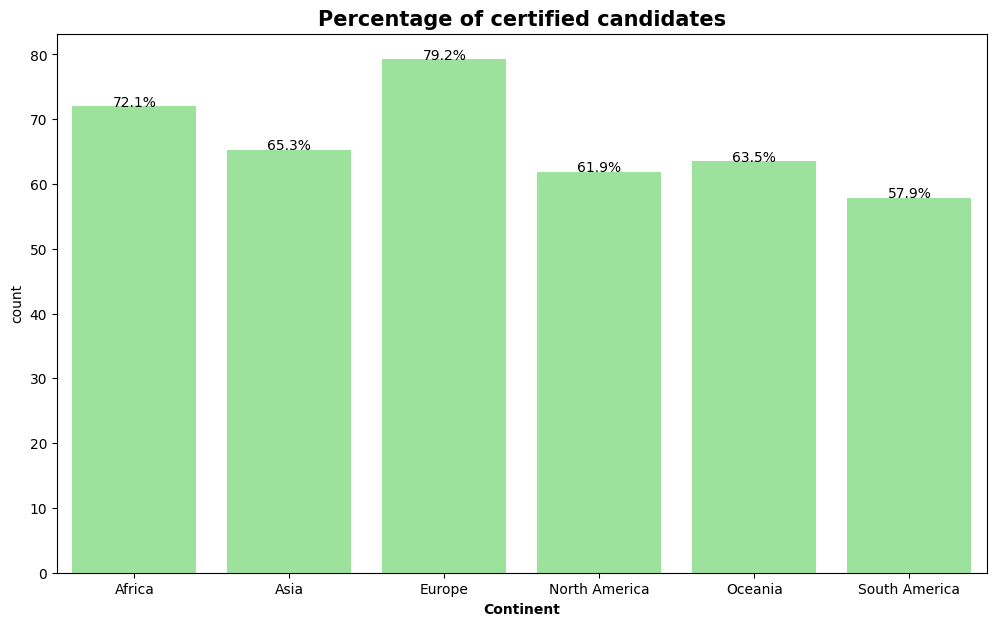

In [100]:
grouped_df = (100*(df[df['case_status']=='Certified'].groupby('continent')['case_status'].count())/(df['continent'].value_counts())).reset_index()
grouped_df.rename(columns={0:'count'}, inplace=True)

plt.figure(figsize=(12,7))
plt.title('Percentage of certified candidates', fontsize=15, fontweight='bold')
sns.barplot(x='continent', y='count', data=grouped_df, color='lightgreen')
for i in range(len(grouped_df)):
    count = grouped_df.loc[i,'count']
    strt = '{:0.1f}%'.format(count)
    plt.text(i,count,strt,ha='center')
plt.xlabel('Continent', fontsize=10, fontweight='bold')
plt.show()

##### Observations:
1. The majority of visa applicants are from Asia, with 65% of them being granted visas and 35% being denied.
2. Only a small number of candidates from Oceania and Africa applied for visas.
3. Candidates from Europe have the highest success rate for visa approval, with 79% of them being granted visas.

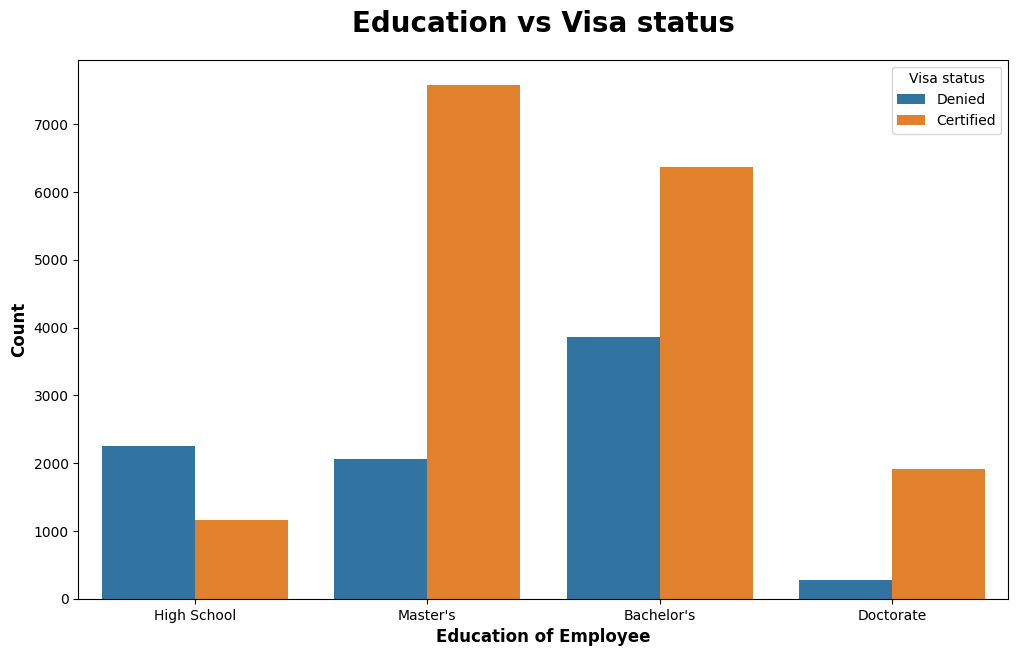

In [99]:
plt.figure(figsize=(12,7))
sns.countplot(x='education_of_employee', hue='case_status', data=df)
plt.title('Education vs Visa status', weight='bold', fontsize=20, pad=20)
plt.xlabel('Education of Employee', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.legend(title='Visa status', fancybox=True)
plt.show()

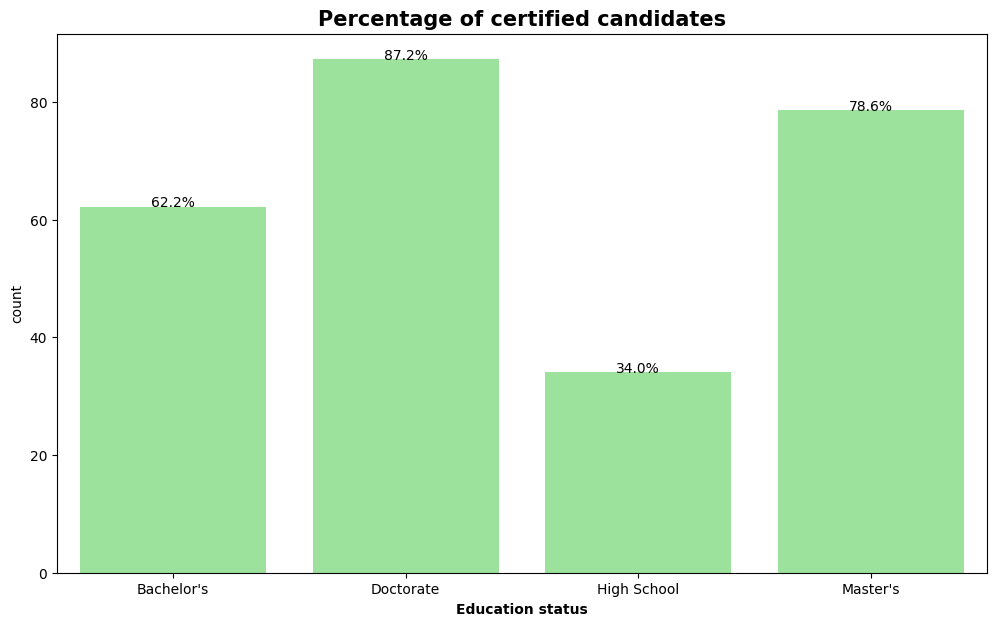

In [116]:
grouped_df = (100*(df[df['case_status']=='Certified'].groupby('education_of_employee')['case_status'].count())/(df['education_of_employee'].value_counts())).reset_index()
grouped_df.rename(columns={0:'count'}, inplace=True)

plt.figure(figsize=(12,7))
plt.title('Percentage of certified candidates', fontsize=15, fontweight='bold')
sns.barplot(x='education_of_employee', y='count', data=grouped_df, color='lightgreen')
for i in range(len(grouped_df)):
    count = grouped_df.loc[i,'count']
    strt = '{:0.1f}%'.format(count)
    plt.text(i,count,strt,ha='center')
plt.xlabel('Education status', fontsize=10, fontweight='bold')
plt.show()

##### Observations:
1. Education of the employee impacts the visa status of the candidate.
2. Success rate is higher for the candidates with Doctorate degree followed by Master's course.

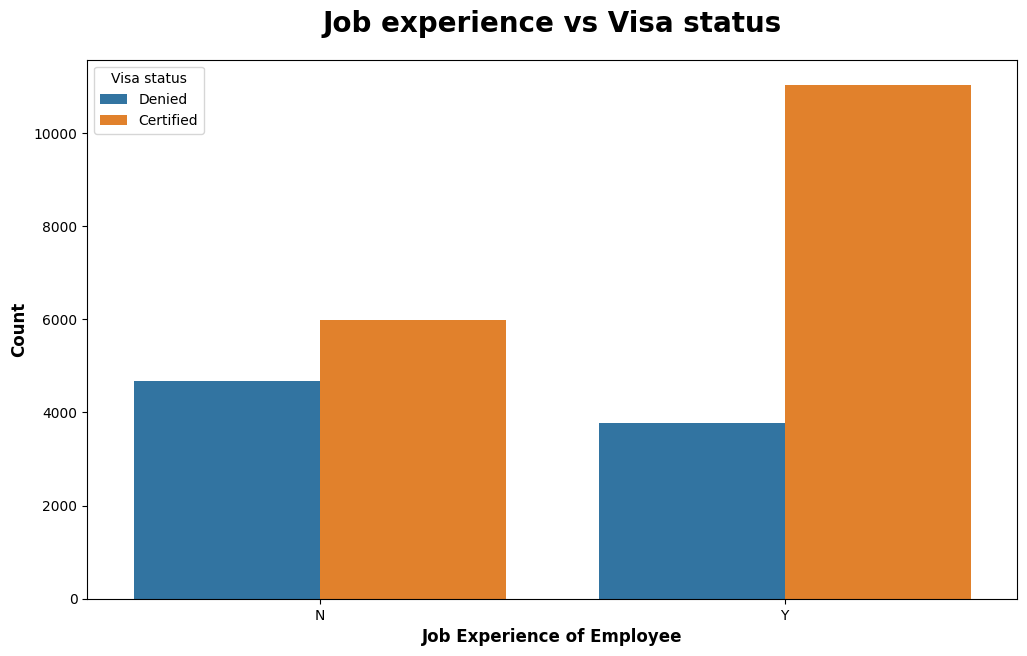

In [115]:
plt.figure(figsize=(12,7))
sns.countplot(x='has_job_experience', hue='case_status', data=df)
plt.title('Job experience vs Visa status', weight='bold', fontsize=20, pad=20)
plt.xlabel('Job Experience of Employee', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.legend(title='Visa status', fancybox=True)
plt.show()

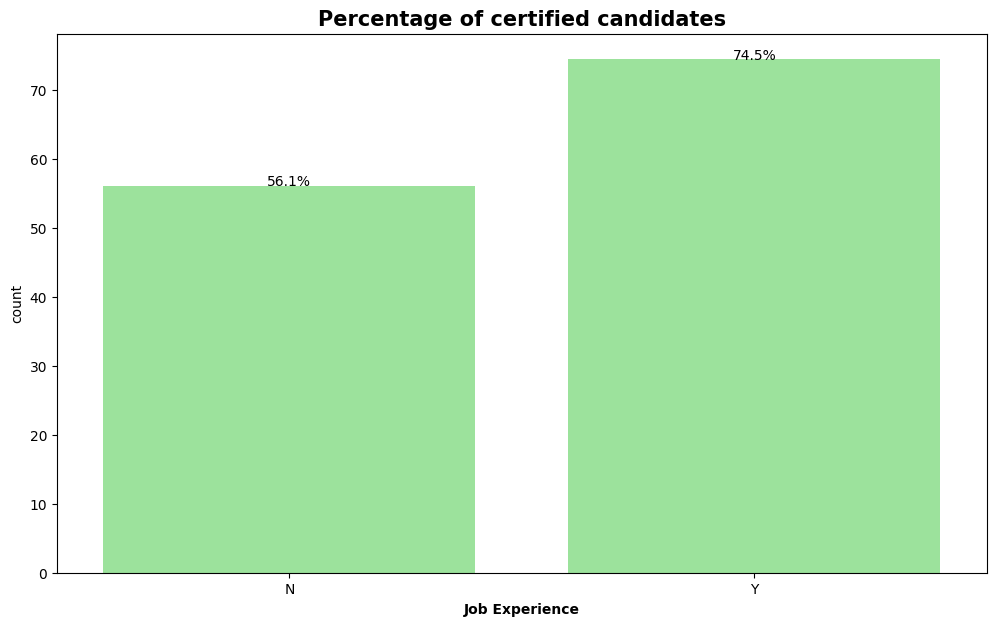

In [117]:
grouped_df = (100*(df[df['case_status']=='Certified'].groupby('has_job_experience')['case_status'].count())/(df['has_job_experience'].value_counts())).reset_index()
grouped_df.rename(columns={0:'count'}, inplace=True)

plt.figure(figsize=(12,7))
plt.title('Percentage of certified candidates', fontsize=15, fontweight='bold')
sns.barplot(x='has_job_experience', y='count', data=grouped_df, color='lightgreen')
for i in range(len(grouped_df)):
    count = grouped_df.loc[i,'count']
    strt = '{:0.1f}%'.format(count)
    plt.text(i,count,strt,ha='center')
plt.xlabel('Job Experience', fontsize=10, fontweight='bold')
plt.show()

##### Observations:
1. Candidates with prior experience are getting certified with 74% success rate and denied with 26%.

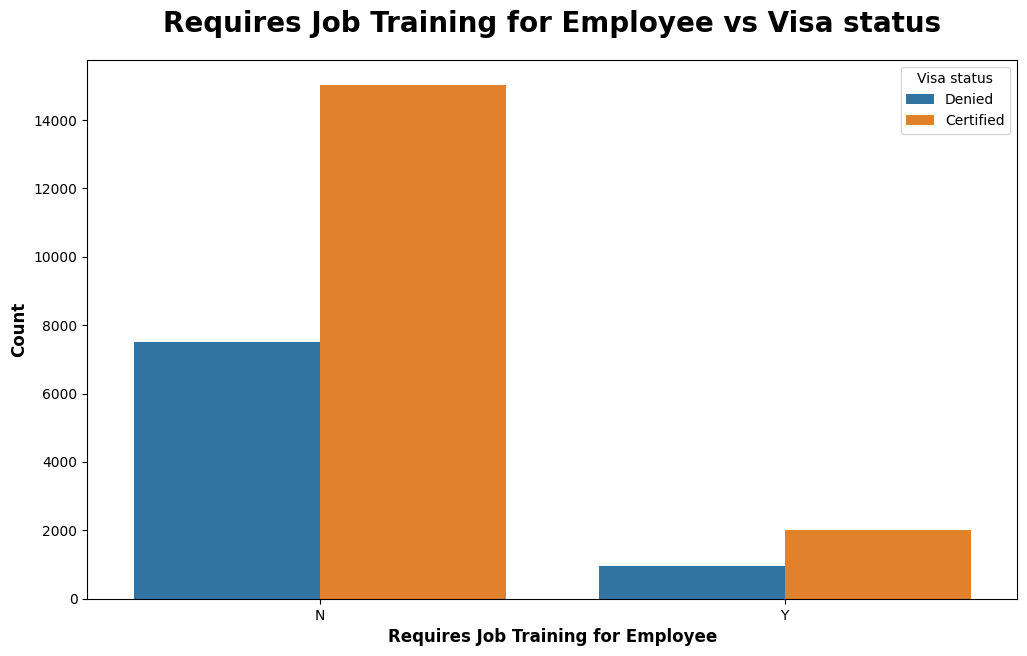

In [119]:
plt.figure(figsize=(12,7))
sns.countplot(x='requires_job_training', hue='case_status', data=df)
plt.title('Requires Job Training for Employee vs Visa status', weight='bold', fontsize=20, pad=20)
plt.xlabel('Requires Job Training for Employee', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.legend(title='Visa status', fancybox=True)
plt.show()

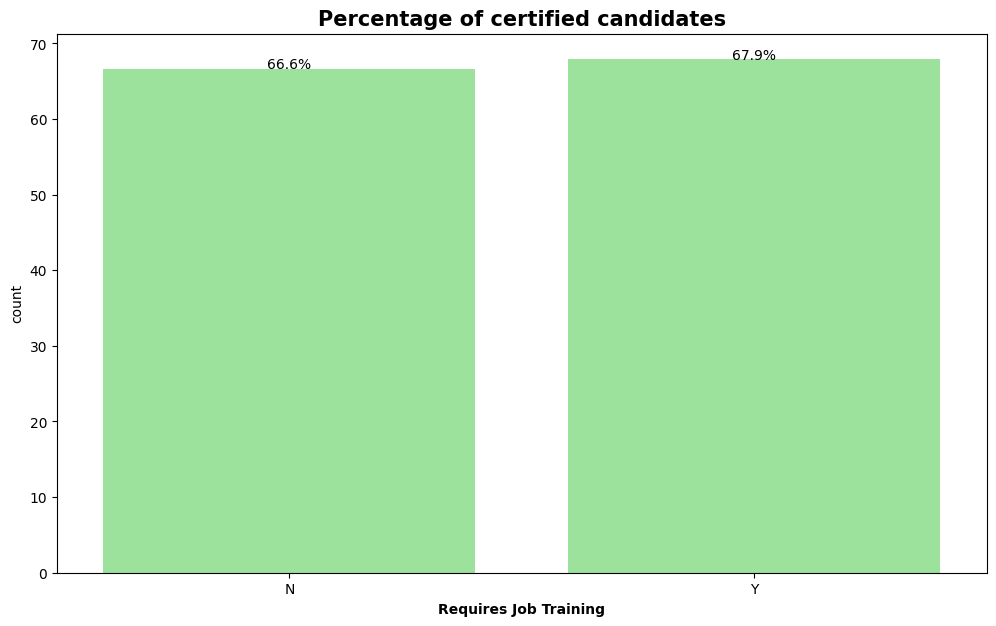

In [120]:
grouped_df = (100*(df[df['case_status']=='Certified'].groupby('requires_job_training')['case_status'].count())/(df['requires_job_training'].value_counts())).reset_index()
grouped_df.rename(columns={0:'count'}, inplace=True)

plt.figure(figsize=(12,7))
plt.title('Percentage of certified candidates', fontsize=15, fontweight='bold')
sns.barplot(x='requires_job_training', y='count', data=grouped_df, color='lightgreen')
for i in range(len(grouped_df)):
    count = grouped_df.loc[i,'count']
    strt = '{:0.1f}%'.format(count)
    plt.text(i,count,strt,ha='center')
plt.xlabel('Requires Job Training', fontsize=10, fontweight='bold')
plt.show()

##### Observations:
1. The `requires_job_training` feature does not significantly impact visa status, as evidenced by the Chi-Square test results.
2. 68% of candidates who require job training were certified, compared to 67% of those who do not require job training.

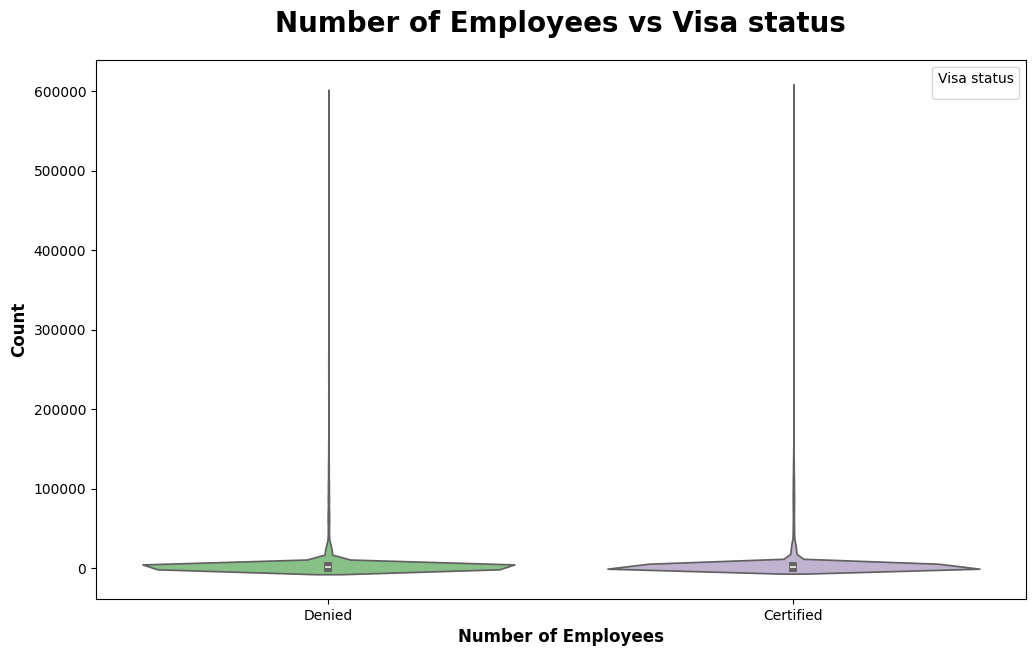

In [124]:
plt.figure(figsize=(12,7))
sns.violinplot(x='case_status', y='no_of_employees', data=df, palette="Accent")
plt.title('Number of Employees vs Visa status', weight='bold', fontsize=20, pad=20)
plt.xlabel('Number of Employees', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.legend(title='Visa status', fancybox=True)
plt.show()

##### Observations
1. The distribution is similar for both the certified and denied category with outliers.

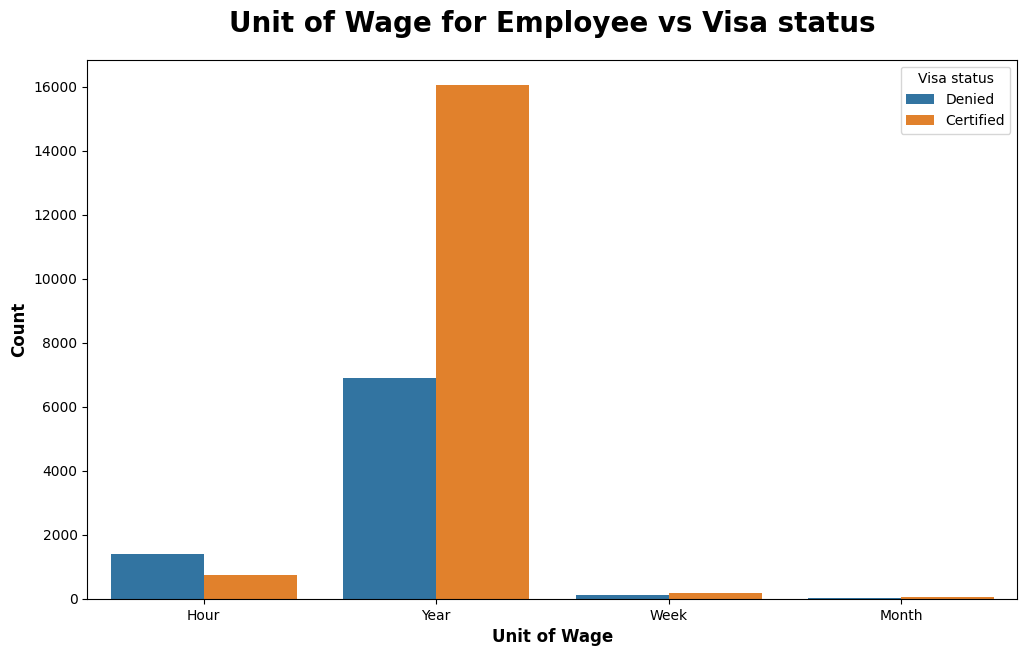

In [126]:
plt.figure(figsize=(12,7))
sns.countplot(x='unit_of_wage', hue='case_status', data=df)
plt.title('Unit of Wage for Employee vs Visa status', weight='bold', fontsize=20, pad=20)
plt.xlabel('Unit of Wage', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.legend(title='Visa status', fancybox=True)
plt.show()

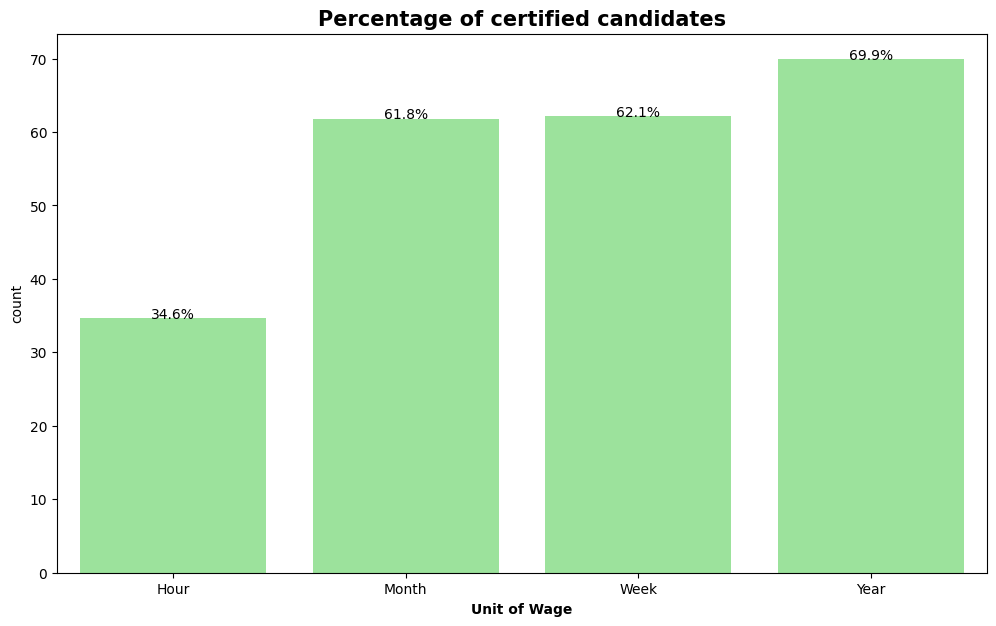

In [127]:
grouped_df = (100*(df[df['case_status']=='Certified'].groupby('unit_of_wage')['case_status'].count())/(df['unit_of_wage'].value_counts())).reset_index()
grouped_df.rename(columns={0:'count'}, inplace=True)

plt.figure(figsize=(12,7))
plt.title('Percentage of certified candidates', fontsize=15, fontweight='bold')
sns.barplot(x='unit_of_wage', y='count', data=grouped_df, color='lightgreen')
for i in range(len(grouped_df)):
    count = grouped_df.loc[i,'count']
    strt = '{:0.1f}%'.format(count)
    plt.text(i,count,strt,ha='center')
plt.xlabel('Unit of Wage', fontsize=10, fontweight='bold')
plt.show()

##### Observations:
1. Only 35% of candidates with an hourly pay rate were granted visas, while 65% were rejected.
2. Candidates with a yearly pay rate, likely those with annual contract roles, had a 70% success rate for visa approval, followed by those with monthly and weekly pay rates.

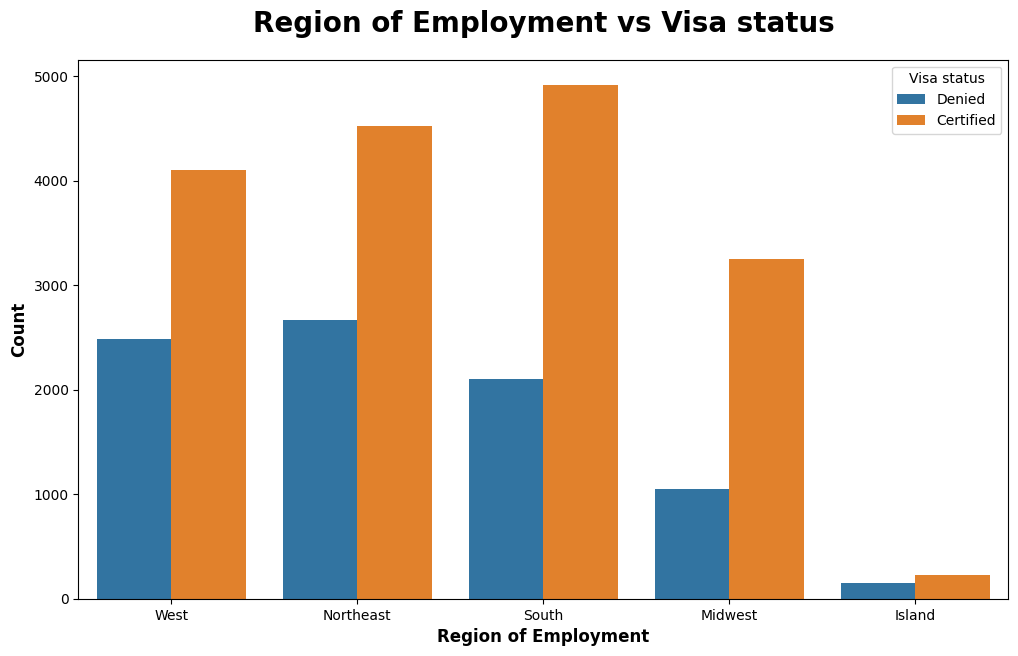

In [128]:
plt.figure(figsize=(12,7))
sns.countplot(x='region_of_employment', hue='case_status', data=df)
plt.title('Region of Employment vs Visa status', weight='bold', fontsize=20, pad=20)
plt.xlabel('Region of Employment', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.legend(title='Visa status', fancybox=True)
plt.show()

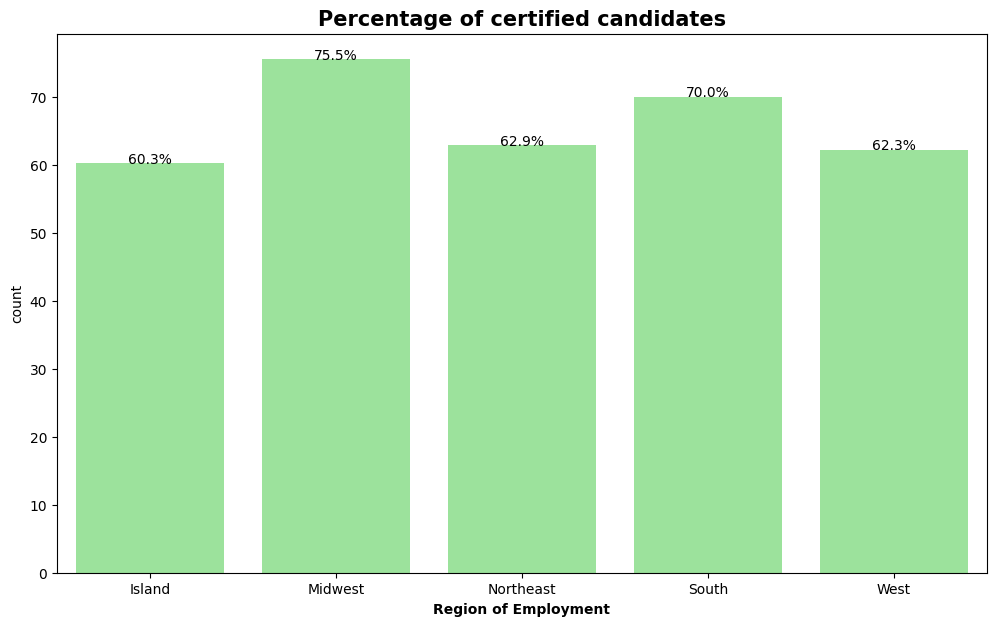

In [129]:
grouped_df = (100*(df[df['case_status']=='Certified'].groupby('region_of_employment')['case_status'].count())/(df['region_of_employment'].value_counts())).reset_index()
grouped_df.rename(columns={0:'count'}, inplace=True)

plt.figure(figsize=(12,7))
plt.title('Percentage of certified candidates', fontsize=15, fontweight='bold')
sns.barplot(x='region_of_employment', y='count', data=grouped_df, color='lightgreen')
for i in range(len(grouped_df)):
    count = grouped_df.loc[i,'count']
    strt = '{:0.1f}%'.format(count)
    plt.text(i,count,strt,ha='center')
plt.xlabel('Region of Employment', fontsize=10, fontweight='bold')
plt.show()

##### Observations:
1. The success rate for the visa approval is almost similar for each of the regions with slightly higher for Midwest followed by South.

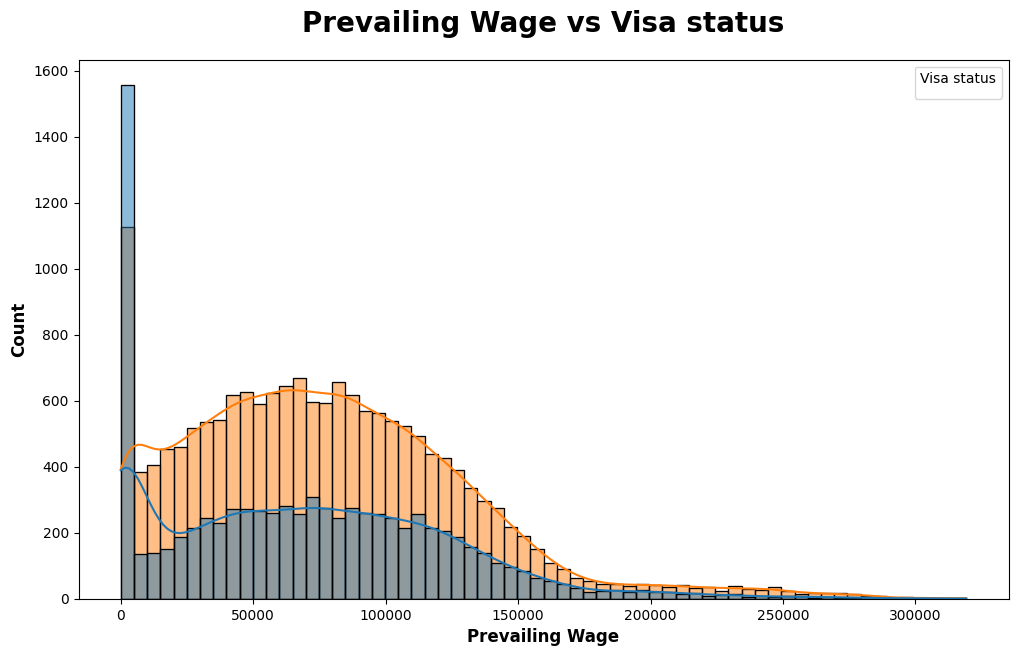

In [131]:
plt.figure(figsize=(12,7))
sns.histplot(x='prevailing_wage', hue='case_status', data=df, kde=True)
plt.title('Prevailing Wage vs Visa status', weight='bold', fontsize=20, pad=20)
plt.xlabel('Prevailing Wage', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.legend(title='Visa status', fancybox=True)
plt.show()

##### Observations:
1. The distrbution is similar for both the categories with some outliers.

##### Prevailing wage based on Education of employees

In [136]:
grouped_df = df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().reset_index().sort_values(by='prevailing_wage', ascending=False)
grouped_df

,education_of_employee,prevailing_wage
3,Master's,78843.057843
0,Bachelor's,73405.443735
2,High School,71582.147756
1,Doctorate,64561.076657


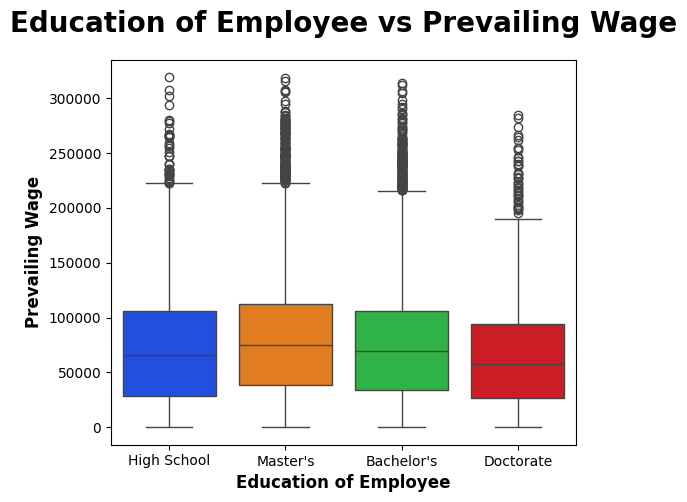

In [139]:
plt.figure(figsize=(6,5))
sns.boxplot(x='education_of_employee', y='prevailing_wage', data=df, palette='bright')
plt.title('Education of Employee vs Prevailing Wage', weight='bold', fontsize=20, pad=20)
plt.xlabel('Education of Employee', weight='bold', fontsize=12)
plt.ylabel('Prevailing Wage', weight='bold', fontsize=12)
plt.show()

##### Observations:
1. Candidates with a Master's degree have a higher prevailing wage rate.
2. Candidates with a Master's degree have a median salary exceeding 70k USD, followed by those with a Bachelor's degree. Surprisingly, candidates with a Doctorate have lower salaries than those with Master's and Bachelor's degrees.

##### Prevailing wage based on Job Experience

In [141]:
grouped_df = df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().reset_index().sort_values(by='prevailing_wage', ascending=False)
grouped_df

,has_job_experience,prevailing_wage
0,N,72602.290
1,Y,69033.665


##### Observations:
1. Candidates who has prior job experience has higher median prevailing wage of 69k USD.
2. Suprisingly those who do not have prior experience have higher salary of 72k USD.

##### Prevailing wage based on Continent

In [143]:
grouped_df = df.groupby('continent')['prevailing_wage'].mean().to_frame().reset_index().sort_values(by='prevailing_wage', ascending=False)
grouped_df

,continent,prevailing_wage
1,Asia,79543.021780
0,Africa,77425.923450
4,Oceania,75994.276719
3,North America,68066.319257
5,South America,60209.575314
2,Europe,59842.925899


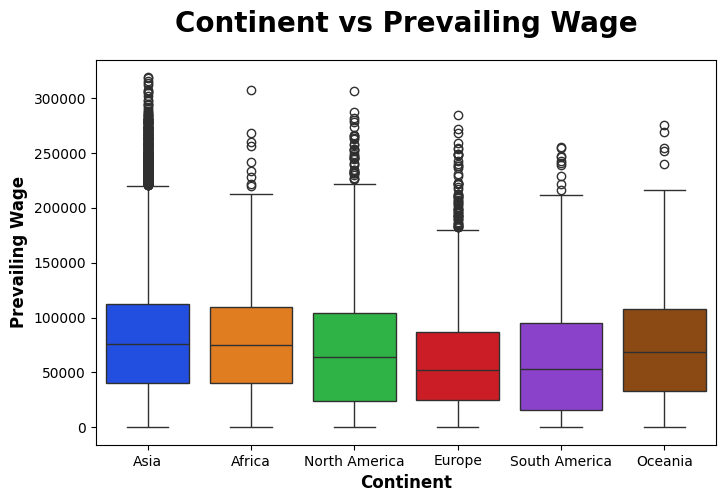

In [146]:
plt.figure(figsize=(8,5))
sns.boxplot(x='continent', y='prevailing_wage', data=df, palette='bright')
plt.title('Continent vs Prevailing Wage', weight='bold', fontsize=20, pad=20)
plt.xlabel('Continent', weight='bold', fontsize=12)
plt.ylabel('Prevailing Wage', weight='bold', fontsize=12)
plt.show()

##### Observations:
1. Average as well as Median salary of the candidates from Asia continent is higher compared to others followed by Africa.

##### Final Analysis:
1. `case_id` column can be dropped.
2. `requires_job_training` column can be dropped as it does not have major impact on case_status.
3. Outliers need to handled for certain columns.
4. Target feature `case_status` is imbalanced which can be handled before model building.